In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import camera
from mpl_toolkits.mplot3d import axes3d
import open3d

In [3]:
# load some images
im1 = np.array(Image.open("./data/MertonCollegeI/001.jpg"))
im2 = np.array(Image.open("./data/MertonCollegeI/002.jpg"))

In [4]:
# load 2D points for each view to a list
points2D = [np.loadtxt(f"./data/MertonCollegeI/2D/00{str(i+1)}.corners").T for i in range(3)]

In [5]:
# load 3D points
points3D = np.loadtxt("./data/MertonCollegeI/3D/p3d").T

In [6]:
points3D.shape, points2D[0].shape

((3, 717), (2, 643))

In [7]:
# load correspondences
corr = np.genfromtxt("./data/MertonCollegeI/2D/nview-corners", dtype="int", missing_values="’")
# load cameras to a list of Camera objects
P = [camera.Camera(np.loadtxt(f"./data/MertonCollegeI/2D/00{str(i+1)}.P")) for i in range(3)]

In [8]:
# make 3D points homogeneous and project
X = np.vstack( (points3D, np.ones(points3D.shape[1])) )
x = P[0].project(X)

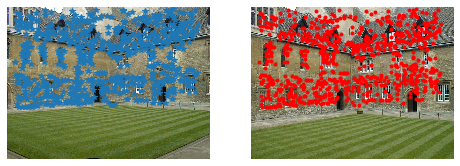

In [9]:
# plotting the points in view 1
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.imshow(im1)
plt.plot(points2D[0][0],points2D[0][1],"*")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(im2)
plt.plot(x[0], x[1], "r.")
plt.axis("off");

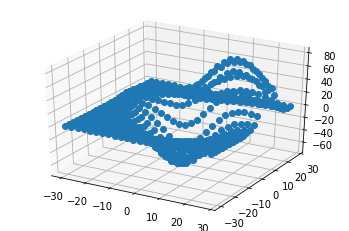

In [10]:
fig = plt.figure()
ax = fig.gca(projection="3d")

# generate 3D sample data
X,Y,Z = axes3d.get_test_data(0.25)

# plot the points in 3D
ax.plot(X.flatten(),Y.flatten(),Z.flatten(),"o")

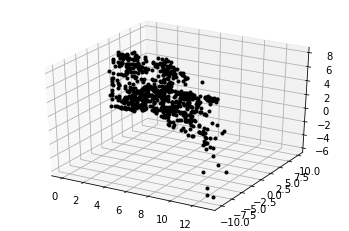

In [11]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(points3D[0], points3D[1], points3D[2],"k.")
plt.show()

In [12]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("../../TestData/fragment.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

Load a ply point cloud, print it, and render it


NameError: name 'o3d' is not defined

In [13]:
open3d.io.read_point_cloud

<function open3d.open3d.io.PyCapsule.read_point_cloud>

In [14]:
pcd = open3d.PointCloud()

In [15]:
pcd.points = open3d.utility.Vector3dVector(points3D.T)

In [16]:
open3d.visualization.draw_geometries([pcd])

In [17]:
from open3d import JVisualizer
visualizer = JVisualizer()

In [18]:
visualizer.add_geometry

<bound method JVisualizer.add_geometry of JVisualizer with 0 geometries>

In [24]:
visualizer = JVisualizer()
visualizer.add_geometry(pcd)
visualizer.show()

JVisualizer with 1 geometries

In [20]:
open3d.io.read_point_cloud

<function open3d.open3d.io.PyCapsule.read_point_cloud>

In [65]:
print(open3d.__version__)

0.8.0.0


In [21]:
import pptk

In [ ]:
pptk.viewer(pcd.points)

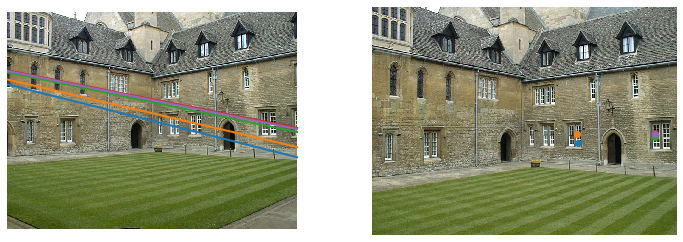

In [34]:
import sfm
# index for points in first two views
ndx = (corr[:,0]>=0) & (corr[:,1]>=0)
# get coordinates and make homogeneous
x1 = points2D[0][:,corr[ndx,0]]
x1 = np.vstack( (x1, np.ones(x1.shape[1])) )
x2 = points2D[1][:,corr[ndx,1]]
x2 = np.vstack( (x2, np.ones(x2.shape[1])) )
# compute F
F = sfm.compute_fundamental(x1,x2)
# compute the epipole
e = sfm.compute_epipole(F)

# plotting
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(im1)
# plot each line individually, this gives nice colors
for i in range(5):
    sfm.plot_epipolar_line(im1,F,x2[:,i],e,False)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(im2)
# plot each point individually, this gives same colors as the lines
for i in range(5):
    plt.plot(x2[0,i],x2[1,i],"o")
plt.axis("off")
plt.show()